In [1]:
import pandas as pd

weights_dir = "../model_weights/clean/pick/LCBC_100_2/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(15):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_lcbc = df

In [2]:
import pandas as pd

weights_dir = "../model_weights/clean/pick/ours_100/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(15):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_ours = df

In [3]:
import pandas as pd

weights_dir = "../model_weights/clean/pick/twoLCBC_100_2/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(15):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_twoLCBC = df

In [4]:
import pandas as pd

weights_dir = "../model_weights/clean/pick/newLCBC_100/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(15):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_newLCBC = df

In [5]:
import pandas as pd

weights_dir = "../model_weights/clean/pick/LCBC_BCE_100/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(15):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_LCBC_BCE = df

In [6]:
import pandas as pd

weights_dir = "../model_weights/clean/pick/outerproduct_mask_off_diag/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(15):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_outerproduct = df

In [7]:
df_outerproduct[["epoch","pick_sum"]]

,epoch,pick_sum
0,0,5.0
1,100,11.0
2,200,7.0
3,300,7.0
4,400,6.0
5,500,5.0
6,600,5.0
7,700,5.0
8,800,5.0
9,900,6.0


In [8]:


ours_sum = df_ours['pick_sum'].to_list()
lcbc_sum = df_lcbc['pick_sum'].to_list()
twoLCBC_sum = df_twoLCBC['pick_sum'].to_list()
newLCBC_sum = df_newLCBC['pick_sum'].to_list()
BCELCBC_sum = df_LCBC_BCE['pick_sum'].to_list()
outerproduct_sum = df_outerproduct['pick_sum'].to_list()

res_len = min(len(df_lcbc['pick_sum'].to_list()), len(df_ours['pick_sum'].to_list()))

epochs = df_ours['epoch'].to_list()[:res_len]

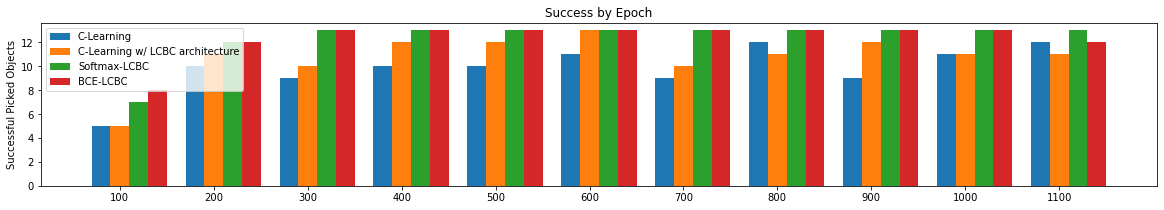

In [20]:
from matplotlib import pyplot as plt

import numpy as np

plt.rcParams["figure.figsize"] = (20,3)

N = len(outerproduct_sum)

ind = np.arange(N) 
width = 0.2     
plt.bar(ind, ours_sum[:N] , width, label='C-Learning')
plt.bar(ind + width, newLCBC_sum[:N], width, label='C-Learning w/ LCBC architecture')
plt.bar(ind + 2*width, lcbc_sum[:N], width, label='Softmax-LCBC')
plt.bar(ind + 3*width, BCELCBC_sum[:N], width, label='BCE-LCBC')


# 
# plt.bar(ind + 5*width, outerproduct_sum[:N], width, label='outer')

plt.ylabel('Successful Picked Objects')
plt.title('Success by Epoch')

plt.xticks(ind + width, epochs[1:N+1])
plt.legend(loc='best')
plt.show()

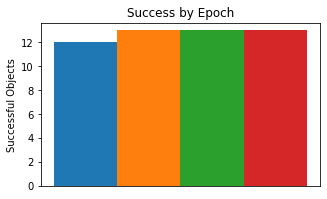

In [22]:
from matplotlib import pyplot as plt

import numpy as np

plt.rcParams["figure.figsize"] = (5,3)

N = 11

ind = np.arange(1) 
width = 0.1      
plt.bar(ind, max(ours_sum[:N]) , width, label='C-Learning')
plt.bar(ind + 1*width, max(newLCBC_sum[:N]), width, label='C-Learning w/ LCBC architecture')
plt.bar(ind + 2*width, max(lcbc_sum[:N]), width, label='Softmax-LCBC')
plt.bar(ind + 3*width, max(BCELCBC_sum[:N]), width, label='BCE-LCBC')


plt.ylabel('Successful Objects')
plt.title('Success by Epoch')
plt.xticks([])
# plt.legend(loc='best')
plt.show()

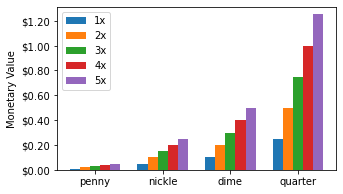

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

coins = ['penny', 'nickle', 'dime', 'quarter']
worth = np.array([.01, .05, .10, .25])

# Coin values times *n* coins
#    This controls how many bars we get in each group
values = [worth*i for i in range(1,6)]

n = len(values)                # Number of bars to plot
w = .15                        # With of each column
x = np.arange(0, len(coins))   # Center position of group on x axis

for i, value in enumerate(values):
    position = x + (w*(1-n)/2) + i*w
    plt.bar(position, value, width=w, label=f'{i+1}x')

plt.xticks(x, coins);

plt.ylabel('Monetary Value')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.2f'))

plt.legend()

In [25]:
((0.7342+0.80)/2)*30 + ((.89 + .84 + .8 + .8)/4)*40 + (0.9)*30

83.313